#**WHO IS WINNING SPACE?** 

In [ ]:
!pip install -q pywaffle

     |████████████████████████████████| 25.1 MB 58.4 MB/s 


In [ ]:
#Import necessary packages
import numpy as np 
import pandas as pd 
from scipy.stats import iqr as sc
import statsmodels.api as sm
pd.set_option('max_columns', 100)

#visualizing
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import Point, Polygon
from pywaffle import Waffle
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

#metrics and split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#model imports
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Space_Missions.csv') 

#View First 50 data points
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
#remove first 2 columns
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
#shape of dataframe
df.shape

(4324, 7)

In [ ]:
#any duplicates? 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [ ]:
#convert Datum to datetime 
#convert Rocket to integer

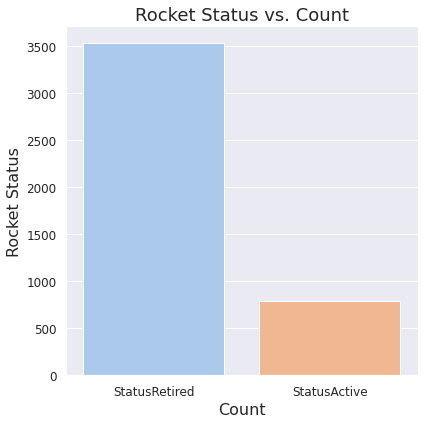

In [ ]:
#rocket status
plt.figure(figsize=(6,6))
ax = sns.countplot(x="Status Rocket", data=df, order=df["Status Rocket"].value_counts().index, palette="pastel")
ax.axes.set_title("Rocket Status vs. Count",fontsize=18)
ax.set_xlabel("Count",fontsize=16)
ax.set_ylabel("Rocket Status",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [ ]:
status = df['Status Rocket'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "domain"}]])
fig.add_trace(go.Bar( x=status.keys(), y=status.values, text=status.values.tolist(), textposition='auto',marker_color='#003786',name='Status'), row=1, col=1)
fig.add_trace(go.Pie(labels=status.keys(),values=status.values,textposition='inside', textinfo='percent+label',marker={'colors':['rgb(178,24,43)','rgb(253,219,199)']}), row=1, col=2)
fig.update_layout(title_text='Status of Rockets', font_size=10, autosize=False, width=800, height=400)
fig.show()

In [ ]:
# Any missing data?
df.isnull().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [ ]:
#drop N/A
#df.dropna(inplace = True)
#df

**K-Nearest Neighbor (KNN) Method:**

Replace missing numerical values with the average of the specific column to remove bias created by completely removing. Including the average instead of NAN is better for data mining and replacing missing values with 0 will drag down your average thus creating bias

In [ ]:
#df= df.fillna(df.mean())
#df

In [ ]:
df.describe().transpose()

,count,unique,top,freq
Company Name,4324,56,RVSN USSR,1777
Location,4324,137,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
Datum,4324,4319,"Wed Nov 05, 2008 00:15 UTC",2
Detail,4324,4278,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,6
Status Rocket,4324,2,StatusRetired,3534
Rocket,964,56,450.0,136
Status Mission,4324,4,Success,3879


In [ ]:
#extract country feature and change some country names.
#countries_dict = {
    #'Russia' : 'Russian Federation',
    #'New Mexico' : 'USA',
    #"Yellow Sea": 'China',
    #"Shahrud Missile Test Site": "Iran",
    #"Pacific Missile Range Facility": 'USA',
    #"Barents Sea": 'Russian Federation',
    #"Gran Canaria": 'USA'
#}

#df['country'] = df['Location'].str.split(', ').str[-1].replace(countries_dict)

In [ ]:
#function to extract the name of the country from the location
def extract_country_name(location):
    country = location.split(',')[-1]
    country = country.strip()
    return country

#dictionary to help in mapping to get consistent and correct Country Names
countries_dict = {
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}

df['country'] = df['Location'].apply(lambda x: extract_country_name(x))
df['country'] = df['country'].replace(countries_dict)

In [ ]:
#extracting date-time features
df['Datum'] = pd.to_datetime(df['Datum'])
df['year'] = df['Datum'].apply(lambda datetime: datetime.year)
df['month'] = df['Datum'].apply(lambda datetime: datetime.month)
df['weekday'] = df['Datum'].apply(lambda datetime: datetime.weekday())

In [ ]:
df.head(3)

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country,year,month,weekday
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,8,4
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,8,3
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



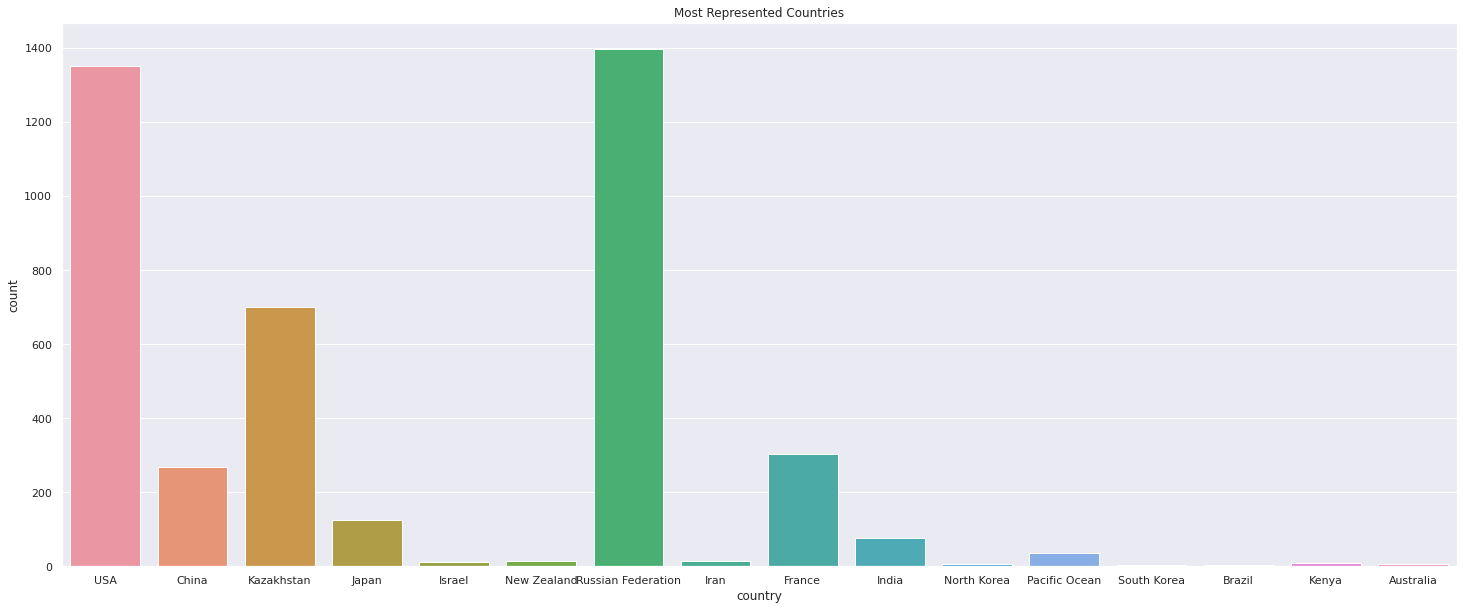

In [ ]:
#most represented countries 
sns.set_palette('bright')
plt.figure(figsize=(25,10))
sns.countplot(df['country'])
plt.title('Most Represented Countries')
plt.show()

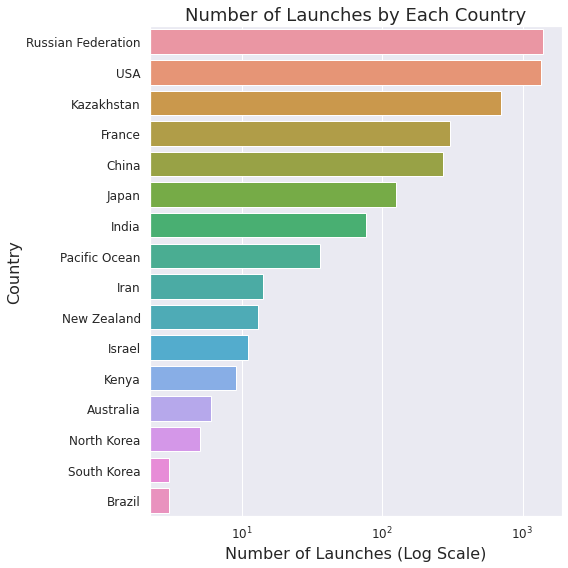

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(y="country", data=df, order=df["country"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Number of Launches by Each Country",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [ ]:
country = df.groupby('country').count()['Detail'].sort_values(ascending=False).reset_index()
country.rename(columns={"Detail":"No of Launches"},inplace=True)
country.head(10).style.background_gradient(cmap='Blues').hide_index()

country,No of Launches
Russian Federation,1398
USA,1351
Kazakhstan,701
France,303
China,269
Japan,126
India,76
Pacific Ocean,36
Iran,14
New Zealand,13


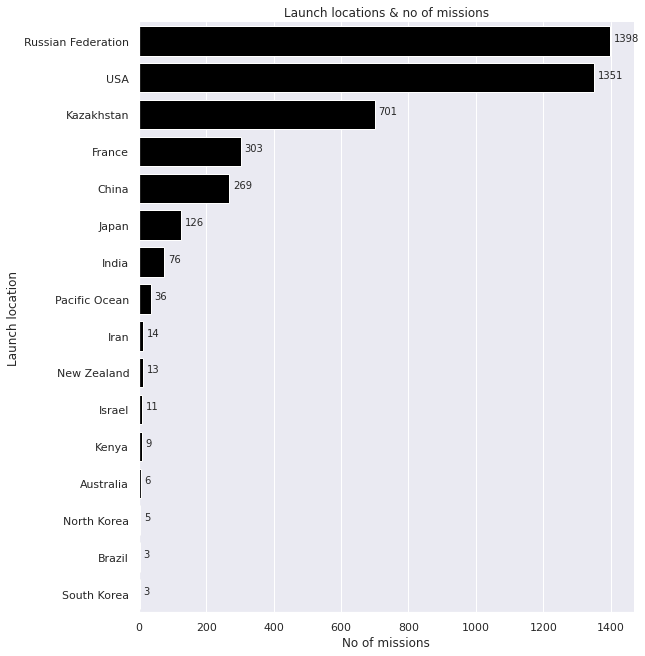

In [ ]:
cnt_co = df.groupby(["country"]).count()[["Location"]].copy().sort_values(by="Location",ascending=False).reset_index()
sns.catplot(y="country",x="Location",data=cnt_co,kind="bar",color="black",height=9,aspect=1)
plt.ylabel("Launch location")
plt.xlabel("No of missions")
plt.title("Launch locations & no of missions")
for i in range(cnt_co.shape[0]):
    plt.text(s=str(cnt_co.iloc[i,1]),y=i,x=cnt_co.iloc[i,1]+10)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 129 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 129 missing from current font.



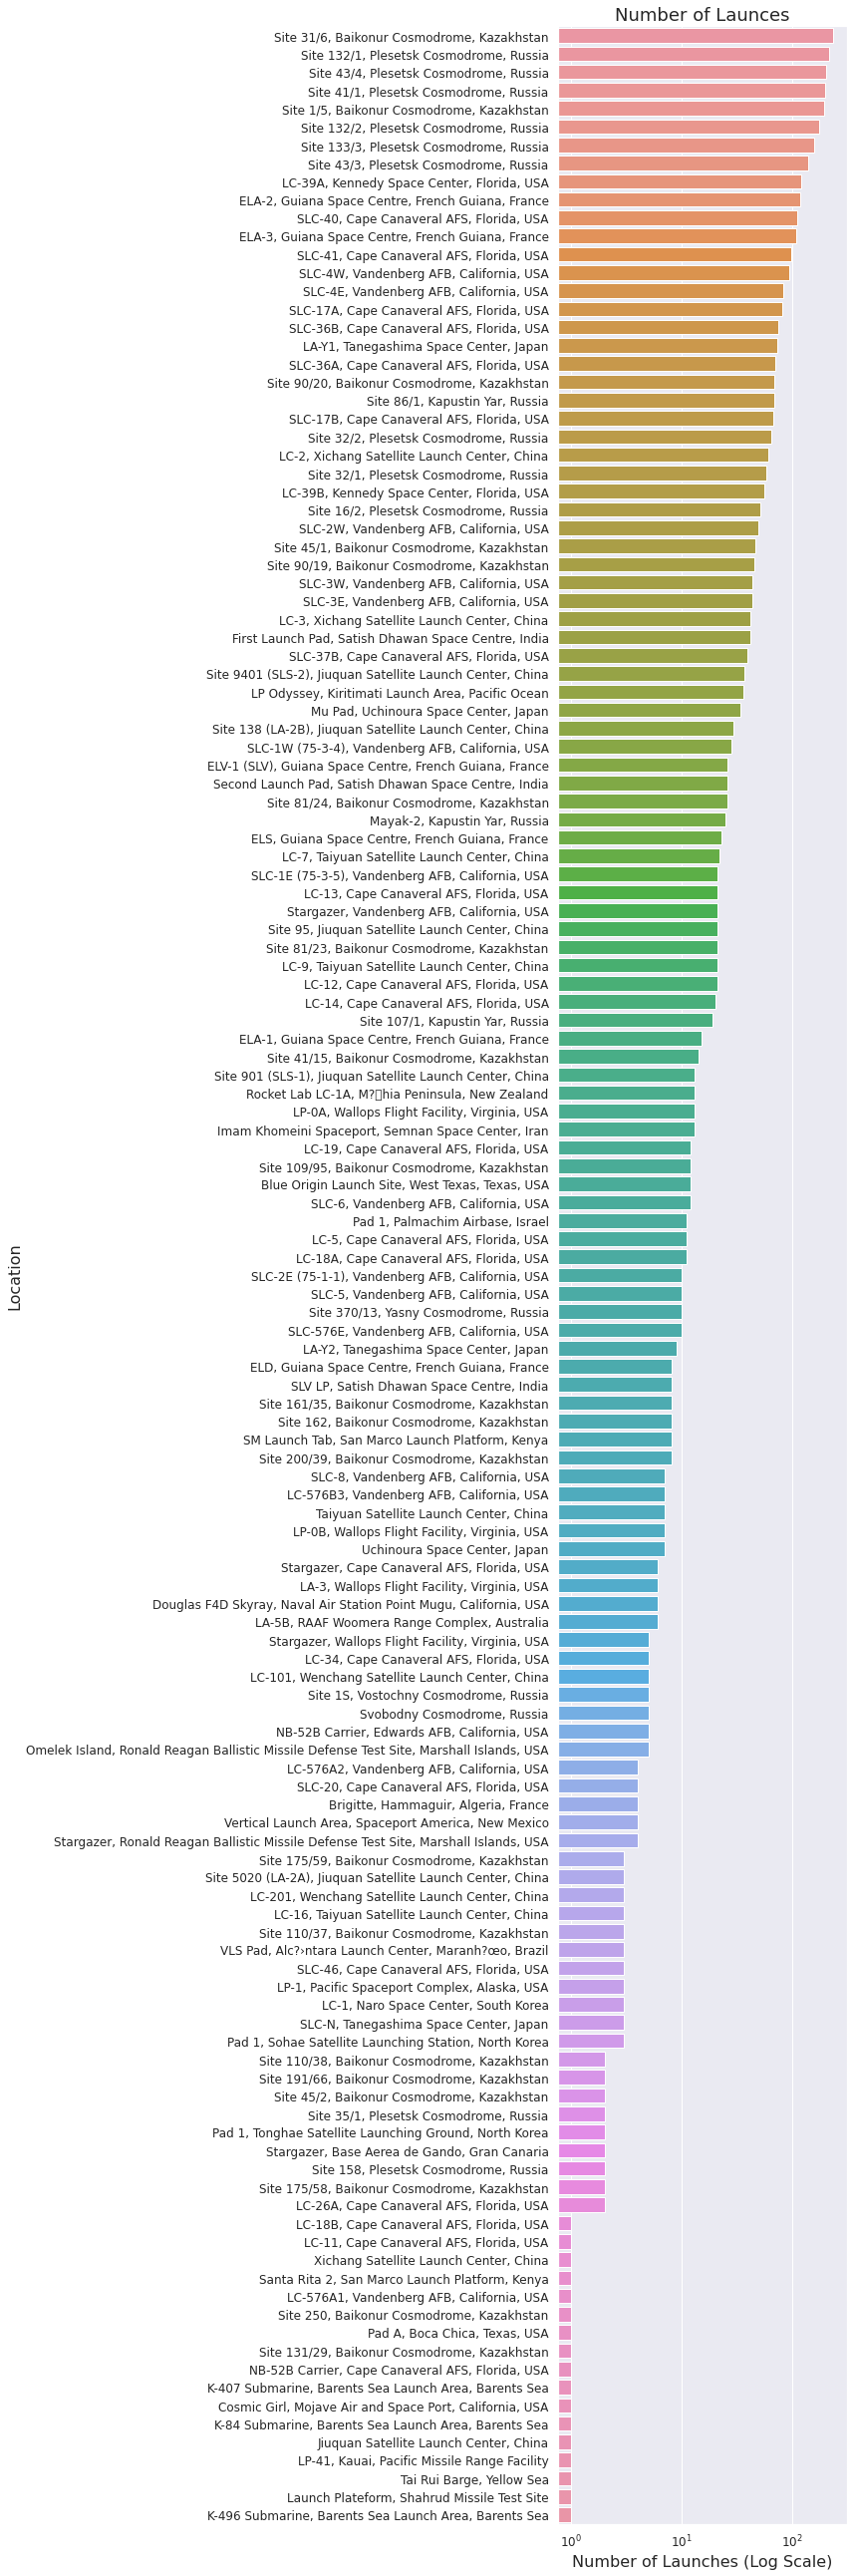

In [ ]:
#launch locations
plt.figure(figsize=(12,36))
ax = sns.countplot(y="Location", data=df, order=df["Location"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Number of Launces",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Location",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

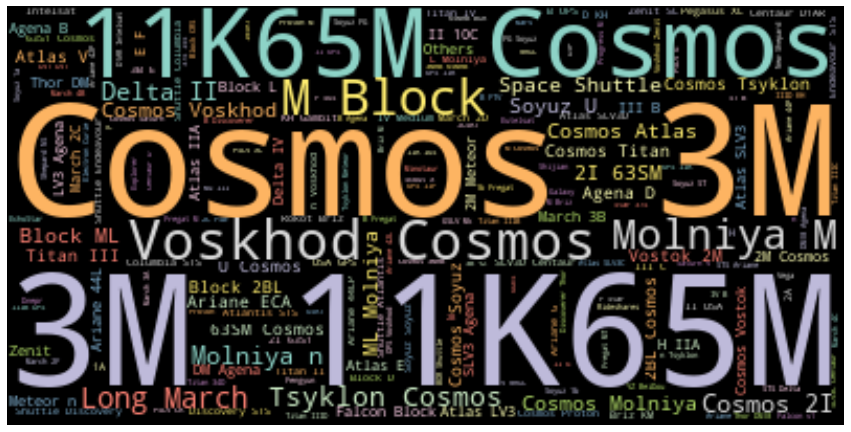

In [ ]:
text = " ".join(review for review in df.Detail)
wordcloud = WordCloud(max_words=200, colormap='Set3',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [ ]:
#number of launces by each country info graphic
#run code again if any blanks
country_counts = dict(df['country'].value_counts())
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Country Name</b>', '<b>Number of Space Missions</b>'],
                line_color='black',
                fill_color='green',
                align='left',
                font=dict(color='red', size=15)),
    cells=dict(values=[list(country_counts.keys()),
                      list(country_counts.values())],
               line_color='black',
               fill_color='white',
               align='left',
               font=dict(color='black', size=13)))
])

fig.update_layout(width=500, height=450,margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Number of Space Missions Per Country</b>', 'x' : 0.95},
                 font_family = 'Fira Code',title_font_color= '#ff0d00')
fig.show()

In [ ]:
#location infographic
country_counts = dict(df['Location'].value_counts())
fig = go.Figure(data=[go.Table(
    header=dict(values=['<b>Country Name</b>', '<b>Number of Space Missions</b>'],
                line_color='black',
                fill_color='purple',
                align='left',
                font=dict(color='lightblue', size=15)),
    cells=dict(values=[list(country_counts.keys()),
                      list(country_counts.values())],
               line_color='black',
               fill_color='white',
               align='left',
               font=dict(color='black', size=13)))
])

fig.update_layout(width=500, height=450,margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Number of Space Missions Per Location</b>', 'x' : 0.95},
                 font_family = 'Fira Code',title_font_color= '#ff0d00')
fig.show()

In [ ]:
# total distinct per year
ds = df["year"].value_counts().reset_index()
ds

,index,year
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


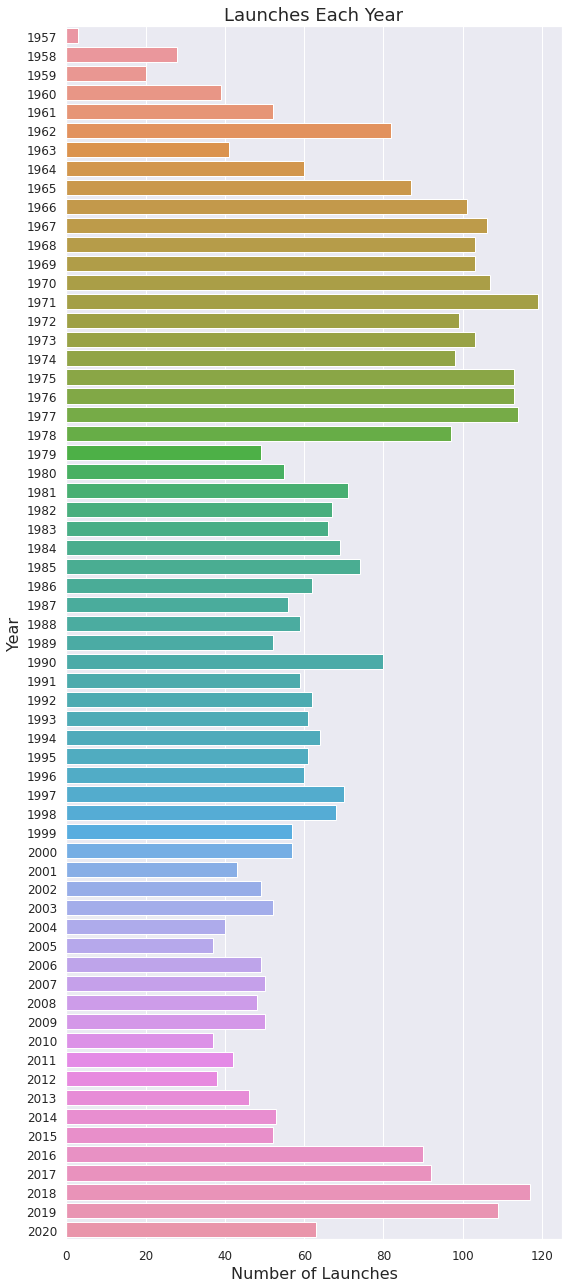

In [ ]:
#number of launches per year
plt.figure(figsize=(8,18))
ax = sns.countplot(y=df['year'])
ax.axes.set_title("Launches Each Year",fontsize=18)
ax.set_xlabel("Number of Launches",fontsize=16)
ax.set_ylabel("Year",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



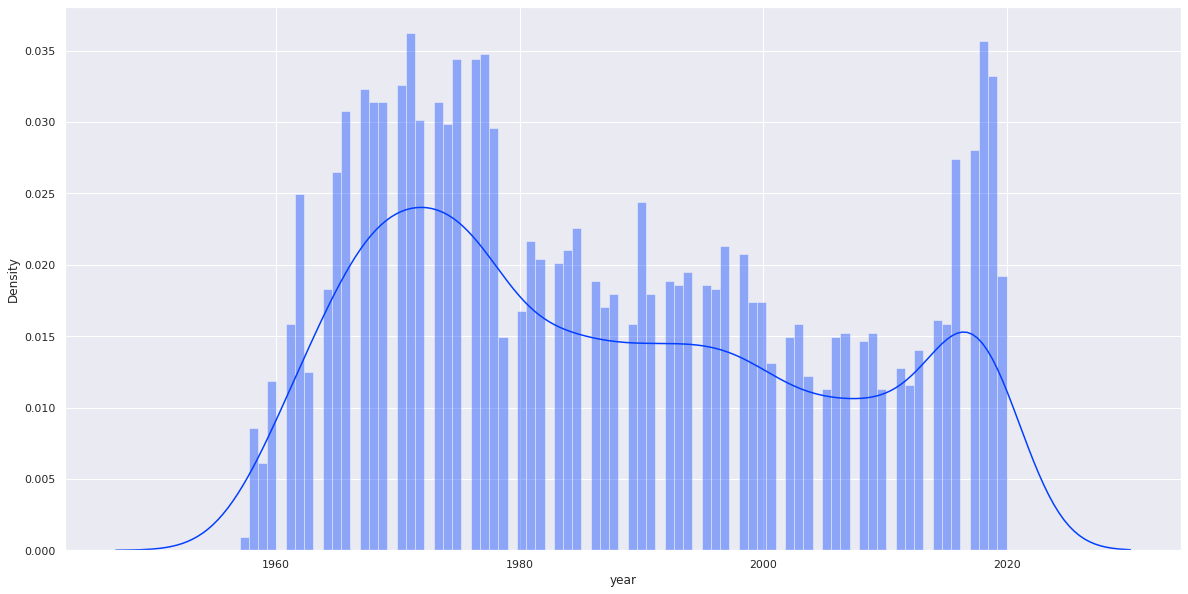

In [ ]:
plt.figure(figsize=(20,10))
sns.distplot(df['year'],bins = 83)

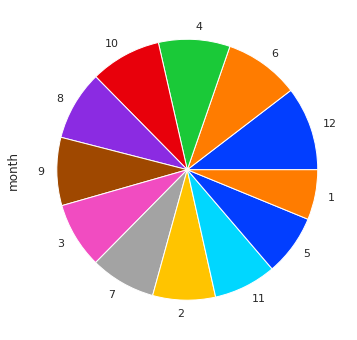

In [ ]:
#by month
df['month'].value_counts().plot(kind='pie', figsize=(6,6))

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



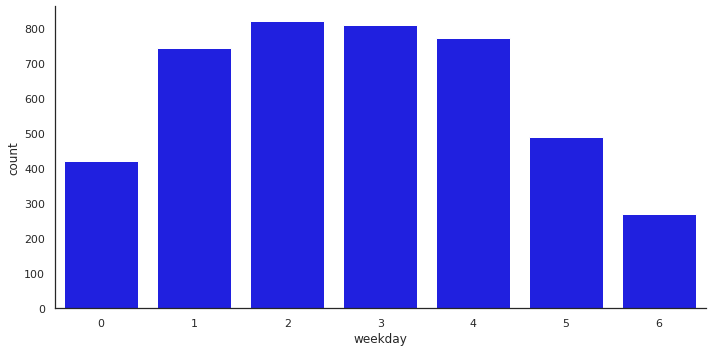

In [ ]:
#weekday
with sns.axes_style('white'):
  g = sns.factorplot("weekday", data = df, aspect=2,
                     kind="count", color='blue')

In [ ]:
#In which years countries were more active?
top_10 = country['country'].head(10)
x= df.groupby(['year','country']).count().reset_index()
x=x[x['country'].isin(top_10)]
px.scatter(x,x='year', y='Detail', color='country')

In [ ]:
#latest year df
df_latest=df[df['year']==2020]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(-0.19999999999998863, 0.5, 'Number of missions')

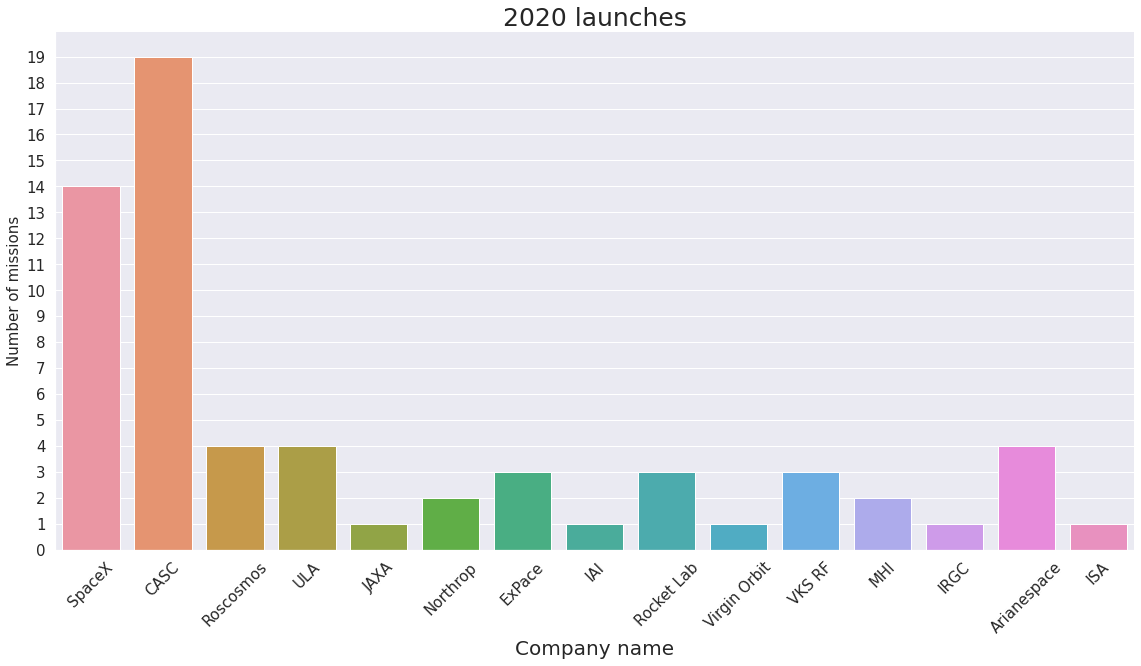

In [ ]:
#plot latetst year
sns.catplot('Company Name',data=df_latest,kind='count',aspect=2,height=8)
plt.yticks(np.arange(20))
plt.title('2020 launches',size=25)
plt.xlabel('Company name',size=20)
plt.xticks(size=15,rotation=45)
plt.yticks(size=15)
plt.ylabel('Number of missions',size=15)

In [ ]:
# creating a single list containing the names of the Launch Vehicles from Detail
details = []
for detail in df.Detail.values:
    d = [x.strip() for x in detail.split('|')]
    for ele in d:
        if('Cosmos' in ele):
            details.append('Cosmos')
        elif('Vostok' in ele):
            details.append('Vostok')
        elif('Tsyklon' in ele):
            details.append('Tsyklon')
        elif('Ariane' in ele):
            details.append('Ariane')
        elif('Atlas' in ele):
            details.append('Atlas')
        elif('Soyuz' in ele):
            details.append('Soyuz')
        elif('Delta' in ele):
            details.append('Delta')
        elif('Titan' in ele):
            details.append('Titan')
        elif('Molniya' in ele):
            details.append('Molniya')
        elif('Zenit' in ele):
            details.append('Zenit')
        elif('Falcon' in ele):
            details.append('Falcon')
        elif('Long March' in ele):
            details.append('Long March')
        elif('PSLV' in ele):
            details.append('PSLV')
        elif('GSLV' in ele):
            details.append('GSLV')
        elif('Thor' in ele):
            details.append('Thor')
        else:
            details.append('Other')

In [ ]:
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,country,year,month,weekday
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,8,4
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,8,3
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8,1
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,7,3
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,7,3


In [ ]:
#launch vehicle 
counts = dict(pd.Series(details).value_counts(sort = True))
fig = go.Figure(go.Bar(x = list(counts.keys()), y = list(counts.values())))
fig.update_layout(template = 'ggplot2',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Number of Missions by Launch Vehicle</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= 'purple',
                 yaxis_title = '<b>Number of Missions</b>',xaxis_title = '<b>Launch Vehicle</b>',)
fig.show()

In [ ]:
#option 2
df['LV'] = df['Detail'].apply(lambda x:x.split()[0])

In [ ]:
ro = df['LV'].value_counts().sort_values(ascending=True)[-50:]
fig = go.Figure(go.Bar(x=ro.values, y=ro.keys(),orientation='h'))
fig.update_layout(title="Launch Vehicle used for number of missions ")

In [ ]:
#Launch vehicle status
success = df[df['Status Mission']=='Success'].groupby('LV').count()['Detail'].reset_index()
not_s = df[df['Status Mission']!='Success'].groupby('LV').count()['Detail'].reset_index()
not_s.rename(columns={'Detail':'Fails'},inplace=True)
total = pd.merge(success,not_s,on='LV').sort_values('Detail',ascending=True)[-50:]
fig = go.Figure()
fig.add_bar(x=total['Detail'],y=total['LV'],orientation='h',name="Success")
fig.add_bar(x=total['Fails'],y=total['LV'],orientation='h',name="Failure")

fig.update_layout(barmode="stack",title="Launch vehicle number of success and Failures",xaxis_title="No of Missions",yaxis_title="Launch Vehicle")
fig.show()

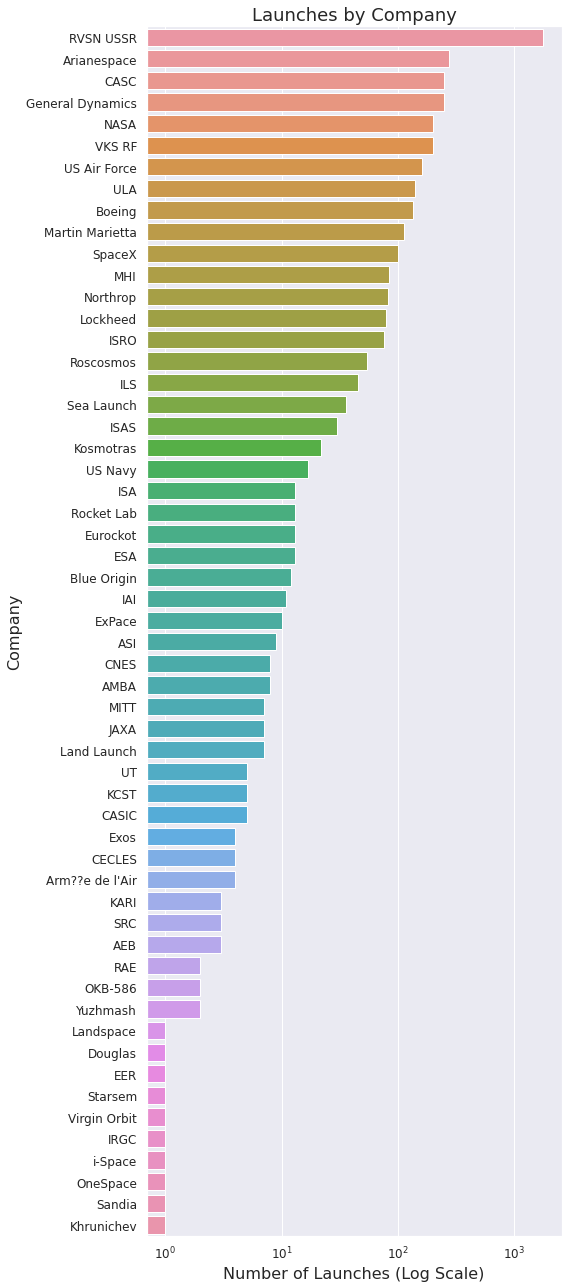

In [ ]:
#number of launces by company 
plt.figure(figsize=(8,18))
ax = sns.countplot(y="Company Name", data=df, order=df["Company Name"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Launches by Company",fontsize=18)
ax.set_xlabel("Number of Launches (Log Scale)",fontsize=16)
ax.set_ylabel("Company",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#companies with most total years taking missions
ds = df.groupby(['Company Name'])['year'].nunique().reset_index()

ds.columns = [
    'company', 
    'count'
]

fig = px.bar(
    ds, 
    x="company", 
    y="count", 
    title='Most experienced companies (years of launches)'
)

fig.show()

In [ ]:
top_20 = df[1:40]
cmp = df.groupby(['Company Name','Status Rocket']).count()['Detail'].reset_index()
cmp = cmp[cmp['Company Name'].isin(top_20['Company Name'])]
active = cmp[cmp['Status Rocket']=="StatusActive"].sort_values('Detail')
retired = cmp[cmp['Status Rocket']!="StatusActive"]
fig = go.Figure()
fig.add_bar(y=active['Detail'],x=active['Company Name'],name='Status Active')
fig.add_bar(y=retired['Detail'],x=retired['Company Name'],name='Status Retired')
fig.update_layout(barmode="stack",title="Comapnies and Mission Status",yaxis_title="No of Missions")
fig.show()

In [ ]:
#Company performance year wise
year_wise = df.groupby(['Company Name','year']).count()['Detail'].reset_index()
year_wise = year_wise[year_wise['Company Name'].isin(df['Company Name'][:20])]

fig = go.Figure(data=go.Heatmap(
        z=year_wise['Detail'],
        x=year_wise['year'],
        y=year_wise['Company Name'],
        colorscale='Viridis'))

fig.update_layout(
    title='Company wise launches  per year',
    xaxis_nticks=36)

fig.show()

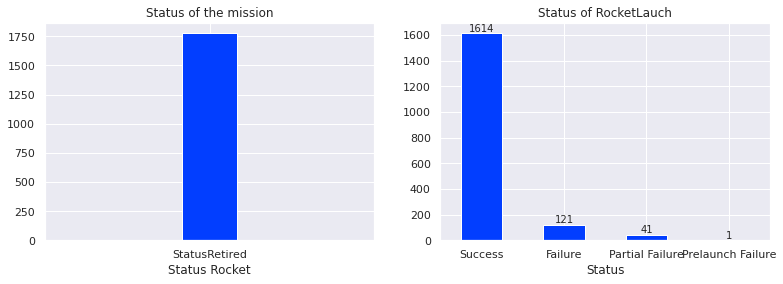

In [ ]:
#RVSN USSR 
df_ussr = df[df['Company Name']=="RVSN USSR"]
plt.subplot(1,2,1)
bar=df_ussr.groupby('Status Rocket').count()['Detail'].plot(kind='bar',figsize=(6,3),width=0.1)
bar.set_xticklabels(bar.get_xticklabels(), rotation=0)
plt.title('Status of the mission')
plt.subplot(1,2,2)
bar=df_ussr['Status Mission'].value_counts().plot(kind='bar',figsize=(13,4))
bar.set_xticklabels(bar.get_xticklabels(), rotation=0)
for p in bar.patches:
  bar.annotate(int(p.get_height()), 
               (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='center', 
               xytext=(0,5), textcoords = 'offset points')
plt.xlabel('Status')
t=plt.title('Status of RocketLauch')

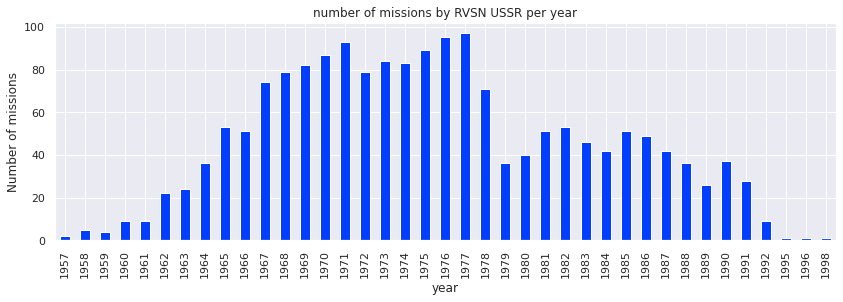

In [ ]:
x=df_ussr.groupby('year').count()['Detail'].plot(kind='bar',figsize=(14,4))
plt.ylabel('Number of missions')
t=plt.title('number of missions by RVSN USSR per year')

In [ ]:
#Analyzing effect of Company
successPerc = df[df['Status Mission'] == 'Success'].groupby('Company Name')['Status Mission'].count()
for company in successPerc.index:
    successPerc[company] = (successPerc[company] / len(df[df['Company Name'] == company]))*100
successPerc = successPerc.sort_index()
FailurePerc = df[df['Status Mission'] == 'Failure'].groupby('Company Name')['Status Mission'].count()
for company in FailurePerc.index:
    FailurePerc[company] = (FailurePerc[company] / len(df[df['Company Name'] == company]))*100
FailurePerc = FailurePerc.sort_index()

In [ ]:
#mission status
df['Status Mission'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status Mission, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



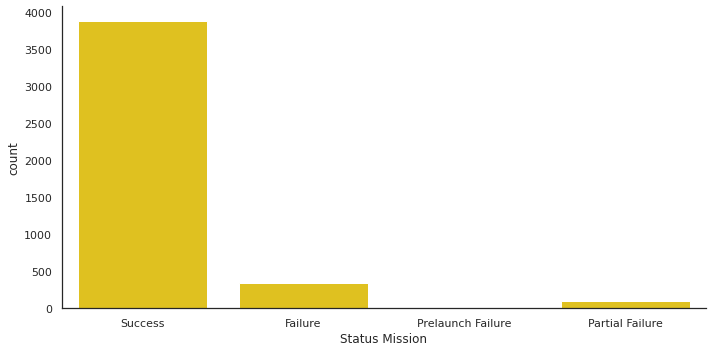

In [ ]:
with sns.axes_style('white'):
  g = sns.factorplot("Status Mission", data = df, aspect=2,
                     kind="count", color='gold')

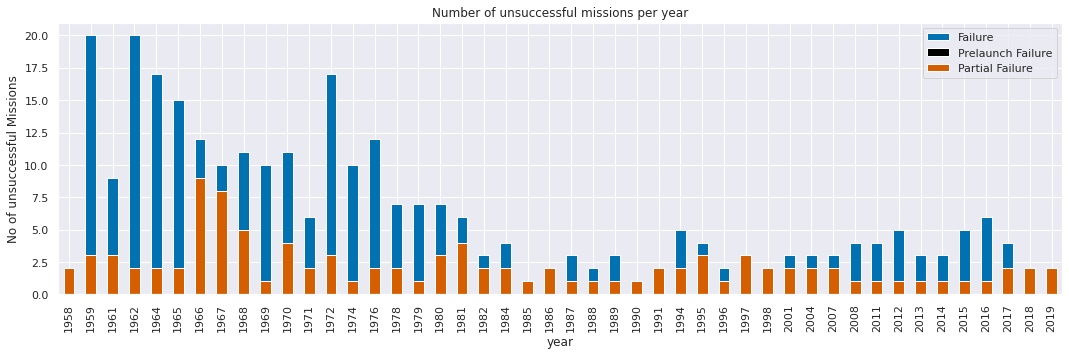

In [ ]:
#Which year has more number of unsuccessful launches?
colors=['#0072b2','#000000','#d55e00']
status= df['Status Mission'].unique()
j=0
for s in status[1:]:
    df[df['Status Mission']==s].groupby('year').count()['Detail'].plot(kind='bar',figsize=(18,5),color=colors[j])
    j+=1
plt.ylabel('No of unsuccessful Missions')
t = plt.title("Number of unsuccessful missions per year")
t=plt.legend(status[1:])

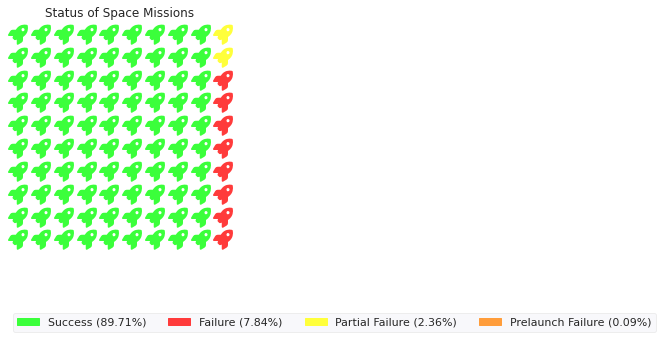

In [ ]:
#waffle Chart of mission satuts
plt.rcParams['figure.figsize'] = (7,12)
data = dict(df['Status Mission'].value_counts(normalize = True) * 100)
fig = plt.figure(
    FigureClass=Waffle, 
    columns=10, 
    values=data, 
    colors=("#3bff3b", "#ff3b3b", "#ffff3b","#ff9d3b"),
    title={'label': 'Status of Space Missions', 'loc': 'center'},
    icons = 'rocket',
    icon_size = 20,
    labels=[f"{k} ({v:.2f}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0.3}
)
plt.show()

In [ ]:
#companies by mission status
fig = px.sunburst(df,path = ['Status Mission','Company Name'])
fig.update_layout(margin=dict(l=80, r=80, t=25, b=10),
                  title = { 'text' : '<b>Countries by Mission Status</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#8000ff')
fig.show()

In [ ]:
#Visualizing effect of Company by mission status
trace1 = go.Bar(x = successPerc.index, y = successPerc.values, name = 'Success Rate of Companies',opacity=0.7)
trace2 = go.Bar(x = FailurePerc.index, y = FailurePerc.values, name = 'Failure Rate of Companies',opacity=0.7)
fig = go.Figure([trace1,trace2])
fig.update_layout(template = 'plotly_white',margin=dict(l=80, r=80, t=25, b=10),
                  title = {'text' : '<b>Success and Failure Rates of Companies</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#8000ff',width = 1000,yaxis_title = '<b>Percentage</b>',xaxis_title = '<b>Companies</b>',
                 legend=dict(
                    yanchor="top",
                    y=0.99,
                    xanchor="left",
                    x=0.01
))

fig.show()

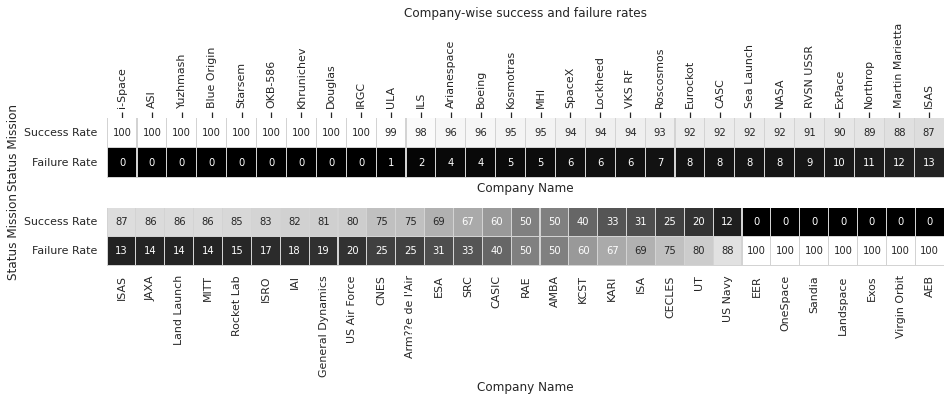

In [ ]:
#success rate per company
piv = df[["Company Name","Status Mission"]].copy()
piv["Status Mission"] = piv["Status Mission"].replace(".* Failure","Failure",regex=True)
piv = pd.crosstab(columns=piv["Status Mission"],index=piv["Company Name"])

piv["Success Rate"] = 100*(piv["Success"] / (piv["Success"]+piv["Failure"]))
piv["Failure Rate"] = 100*(piv["Failure"] / (piv["Success"]+piv["Failure"]))
piv.sort_values(by="Success Rate",ascending=False,inplace=True)

piv.drop(columns=["Failure","Success"],inplace=True)

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,3))
ax1.set_title("Company-wise success and failure rates")
plt.ylabel("Company")
ax1.xaxis.set_ticks_position('top')
plt.xticks(rotation=90)
sns.heatmap(piv[:28].T,annot=True,fmt="0.0f",cbar=False,cmap="gray",square=True,linewidths=0.1,linecolor="lightgray",ax=ax1)
sns.heatmap(piv[27:].T,annot=True,fmt="0.0f",cbar=False,cmap="gray",square=True,linewidths=0.1,linecolor="lightgray",ax=ax2)
plt.show()

In [ ]:
#mars club
df_nasa=df[df['Company Name']=='NASA']
df_isro=df[df['Company Name']=='ISRO']
df_esa=df[df['Company Name']=='ESA']
df_rosc=df[df['Company Name']=='Roscosmos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

Text(0.5, 1.0, 'ISRO success rate = 67.11%')

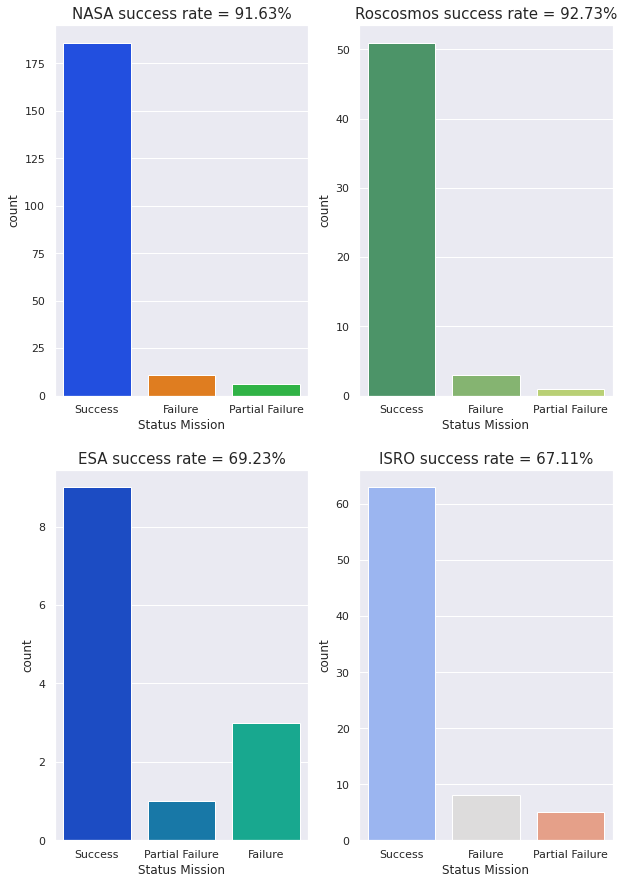

In [ ]:
#plot success rate of mars club
fig1=plt.figure(figsize=(10,15))
ax1=fig1.add_subplot(221)
sns.countplot('Status Mission',data=df_nasa,ax=ax1)
ax1.set_title('NASA success rate = {0:.2f}%'.format(100*df_nasa['Status Mission'].value_counts()[0]/df_nasa.shape[0]),size=15)

ax2=fig1.add_subplot(222)
sns.countplot('Status Mission',data=df_rosc,ax=ax2,palette='summer')
ax2.set_title('Roscosmos success rate = {0:.2f}%'.format(100*df_rosc['Status Mission'].value_counts()[0]/df_rosc.shape[0]),size=15)


ax3=fig1.add_subplot(223)
sns.countplot('Status Mission',data=df_esa,ax=ax3,palette='winter')
ax3.set_title('ESA success rate = {0:.2f}%'.format(100*df_esa['Status Mission'].value_counts()[0]/df_esa.shape[0]),size=15)


ax4=fig1.add_subplot(224)
sns.countplot('Status Mission',data=df_isro,ax=ax4,palette='coolwarm')
ax4.set_title('ISRO success rate = {0:.2f}%'.format(100*df_rosc['Status Mission'].value_counts()[0]/df_isro.shape[0]),size=15)

In [ ]:
#viewing countries with most sucessful launches each year
ds = df[df['Status Mission']=='Success']
ds = ds.groupby(['year', 'country'])['Status Mission'].count().reset_index().sort_values(['year', 'Status Mission'], ascending=False)
ds = pd.concat([group[1].head(1) for group in ds.groupby(['year'])])
ds.columns = ['year', 'country', 'launches']

fig = px.bar(
    ds, 
    x="year", 
    y="launches", 
    color='country', 
    title='Leaders by success launches for every year (countries)',
    width=800
)

fig.show()

In [ ]:
#treemap of mission status, coutrries and companies 
fig = px.treemap(df,path = ['Status Mission','country','Company Name'])
fig.update_layout(template = 'ggplot2',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Mission Status, Countries and Companies</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= 'black')
fig.show()

In [ ]:
#analyzing affect of launch time against period
fig = make_subplots(rows = 3, cols = 1)
for i, period in enumerate(['year', 'month', 'weekday']):
    data = df[df['Status Mission'] == 'Success'][period].value_counts().sort_index()
    data = dict((data / df[period].value_counts().sort_index())*100.0)
    mean = sum(data.values()) / len(data)
    if(period == 'year'):
        x = list(data.keys())
    elif(period == 'month'):
        x = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August','September','October', 'November', 'December']
    else:
        x = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
    trace1 = go.Scatter(x = x, y = list(data.values()),mode = 'lines',text = list(data.keys()),name = f'Success in each {period}',connectgaps = False)
    trace2 = go.Scatter(x = x, y = [mean]*len(data), mode = 'lines',showlegend=False,name = f'Mean Success over the {period}s',line = {'dash':'dash','color':
                                                                                                                                       'grey'})
    fig.append_trace(trace1, row = i+1, col = 1)
    fig.append_trace(trace2, row = i+1, col = 1)
fig.update_layout(template = 'simple_white',height = 600,
                  title = { 'text' : '<b>Succesful Missions (as a percentage of total missions in that TimeFrame) </b>', 'x' : 0.5})
for i in range(1,4):
    fig.update_yaxes(title_text = '<b>Percentage</b>',row = i, col = 1)
fig.show()

In [ ]:
#analyzing affect of launch time against period
fig = make_subplots(rows = 3, cols = 1)
for i, period in enumerate(['year', 'month', 'weekday']):
    data = df[df['Status Mission'] == 'Failure'][period].value_counts().sort_index()
    data = dict((data / df[period].value_counts().sort_index())*100.0)
    mean = sum(data.values()) / len(data)
    if(period == 'year'):
        x = list(data.keys())
    elif(period == 'month'):
        x = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August','September','October', 'November', 'December']
    else:
        x = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']
    trace1 = go.Scatter(x = x, y = list(data.values()),mode = 'lines',text = list(data.keys()),name = f'Failures in each {period}',connectgaps = False)
    trace2 = go.Scatter(x = x, y = [mean]*len(data), mode = 'lines',showlegend=False,name = f'Mean failures over the {period}s',line = {'dash':'dash','color':
                                                                                                                                       'grey'})
    fig.append_trace(trace1, row = i+1, col = 1)
    fig.append_trace(trace2, row = i+1, col = 1)
fig.update_layout(template = 'simple_white',height = 600,
                  title = { 'text' : '<b>Failed Missions (as a percentage of total missions in that TimeFrame) </b>', 'x' : 0.5})
for i in range(1,4):
    fig.update_yaxes(title_text = '<b>Percentage</b>',row = i, col = 1)
fig.show()

In [ ]:
#Analyzing the effect of Mission Cost
df[' Rocket'] = df[' Rocket'].apply(lambda x: str(x).replace(',',''))
df[' Rocket'] = df[' Rocket'].astype('float64')
df[' Rocket'] = df[' Rocket'].fillna(0)

In [ ]:
costDict = dict(df[df[' Rocket'] > 0].groupby('year')[' Rocket'].mean())
fig = go.Figure(go.Scatter(x = list(costDict.keys()), y = list(costDict.values()), yaxis = 'y2',mode = 'lines',showlegend=False,name = 'Average Mission Cost Over the years'))
fig.update_layout(template = 'plotly_dark',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Average Mission Cost Over the years</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#cacaca',
                 yaxis_title = '<b>Cost of Mission in Million Dollars</b>',xaxis_title = '<b>Year of Launch</b>',)
fig.show()

In [ ]:
fig = px.scatter(df[df[' Rocket'].between(1,4999)],x = 'year', y = 'country', color = 'Status Mission',size = ' Rocket', size_max=30)
fig.update_layout(template = 'simple_white',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Average Mission Cost Over the years For Various Countries</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#00b300')
fig.show()

In [ ]:
fig = px.scatter(df[df[' Rocket'].between(1,4999)],x = 'year', y = 'Company Name',color = 'Status Mission',size = ' Rocket',size_max = 30)
fig.update_layout(template = 'simple_white',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Average Mission Cost Over the years For Various Companies</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#00b300',height = 650)
fig.show()

In [ ]:
#Country and their budgets for space mission
b = df.groupby('country').sum()[' Rocket'].reset_index()
c= df.groupby('country').count()['Detail'].sort_values(ascending=False).reset_index()
c = c.merge(b,on='country')


y_count=c['Detail'][::-1]
y_net_worth = c[' Rocket'][::-1]
x=c['country'][::-1]

fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y_count,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Countries and number of missions',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_net_worth, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Mission budget, Million USD',
), 1, 2)

fig.update_layout(
    title='Number of missions per country & Money spent in million dollars',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=25000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(y_count, decimals=2)
y_nw = np.rint(y_net_worth)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x):
 
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn - 20000,
                            text='{:,}'.format(ydn) + 'M',
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))

    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 22,
                            text=str(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))
# Source
annotations.append(dict(xref='paper', yref='paper',
                        x=-0.2, y=-0.109,
                        text="Country with number of missions and money spent on all missions",
                        font=dict(family='Arial', size=10, color='rgb(150,150,150)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

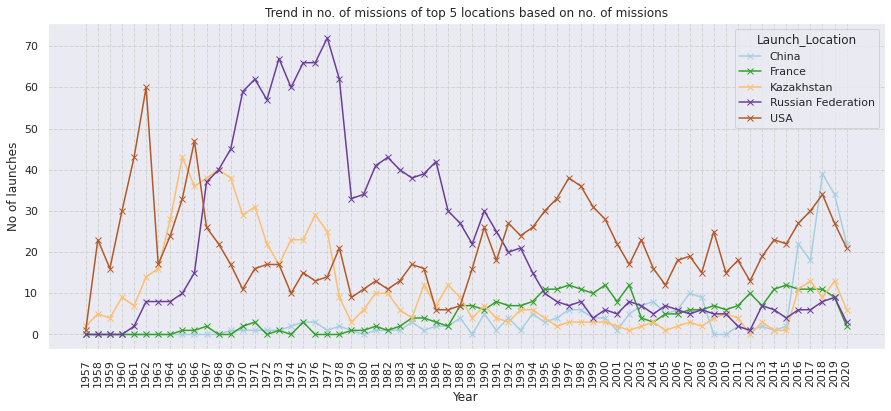

In [ ]:
#How's the yearly trend in number of launches of top 5 locations based on number of launches?
cl1 = df[df["country"].isin(cnt_co.loc[:4,"country"])].copy()
cl1.rename(columns={"country":"Launch_Location"},inplace=True)
cl1 = pd.crosstab(index=cl1["year"],columns=cl1["Launch_Location"]).copy()
ax=cl1.plot(figsize=(15,6),cmap="Paired",marker="x")
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgray', linestyle='dashed')
ax.xaxis.grid(color='lightgray', linestyle='dashed')
plt.title("Trend in no. of missions of top 5 locations based on no. of missions")
plt.xlabel("Year")
plt.ylabel("No of launches")
plt.xticks(range(1957,2021))
plt.xticks(rotation=90)
plt.show()

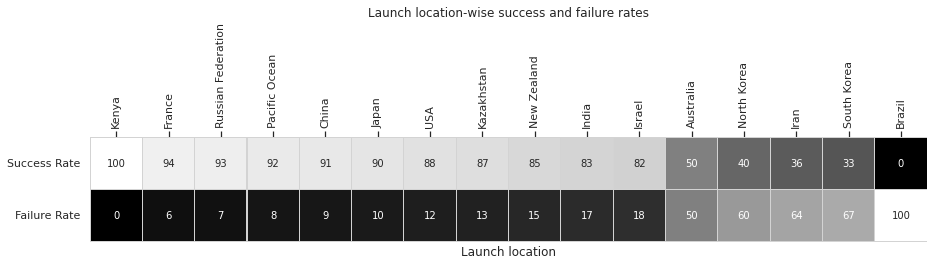

In [ ]:
#What's the success rate per launch locations? 
piv = df[["country","Status Mission"]].copy()
piv["Status Mission"] = piv["Status Mission"].replace(".* Failure","Failure",regex=True)
piv = pd.crosstab(columns=piv["Status Mission"],index=piv["country"])

piv["Success Rate"] = 100*(piv["Success"] / (piv["Success"]+piv["Failure"]))
piv["Failure Rate"] = 100*(piv["Failure"] / (piv["Success"]+piv["Failure"]))
piv.sort_values(by="Success Rate",ascending=False,inplace=True)

piv.drop(columns=["Failure","Success"],inplace=True)

fig=plt.figure(figsize=(15,5))
ax=sns.heatmap(piv.T,annot=True,fmt="0.0f",cbar=False,cmap="gray",square=True,linewidth=0.1,linecolor="lightgray")
ax.xaxis.set_ticks_position('top')
plt.xticks(rotation=90)
plt.title("Launch location-wise success and failure rates")
plt.xlabel("Launch location")
plt.ylabel("")
plt.show()

In [ ]:
#kenya and brazil
aa=df.loc[(df["country"]=="Kenya") | (df["country"]=="Brazil"),["country","Status Mission"]].reset_index(drop=True)
aa.columns=["Launch Location","Mission Status"]
aa.groupby(["Launch Location","Mission Status"]).size()

Launch Location  Mission Status   
Brazil           Failure              2
                 Prelaunch Failure    1
Kenya            Success              9
dtype: int64

***Model Performance:***

No hyperparameter tuning, train the model using these features :

Company Name
Location of Launch
Rocket, i.e the cost of the mission
Country
year of launch
month of launch
weekday of launch


The objective is to predict the target column, which in this case is the Status of the Mission. Care should be taken that in order to make things easier, I consider any mission that was not a Success as a failure,i.e, partial failures and prelaunch failures are just failures in our eyes.

In [ ]:
#importing modeling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df['Target'] = (~(df['Status Mission'] == 'Success')).astype('int32')

In [ ]:
X = df[['Company Name',' Rocket','country', 'year', 'month', 'weekday']]
encoder = LabelEncoder()
X.loc[:,'Company Name'] = encoder.fit_transform(X['Company Name'])
X.loc[:,'country'] = encoder.fit_transform(X['country'])
y = df['Target']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify = y)

In [ ]:
#XGBoost Classifier model on the dataset
classifier_xgb = xgb.XGBClassifier(random_state = 0, n_jobs = -1,max_depth = 5)
classifier_xgb.fit(X_train,y_train)

XGBClassifier(max_depth=5, n_jobs=-1)

In [ ]:
print(f'Training Accuracy is {accuracy_score(y_train, classifier_xgb.predict(X_train))*100:.2f}%')
print(f'Testing Accuracy is {accuracy_score(y_test, classifier_xgb.predict(X_test))*100:.2f}%')

Training Accuracy is 91.79%
Testing Accuracy is 90.40%


In [ ]:
feature_importance_xgb = classifier_xgb.get_booster().get_fscore()

In [ ]:
from plotly.offline import init_notebook_mode, iplot, plot

In [ ]:
trace = go.Bar(x = list(feature_importance_xgb.values()), y = list(feature_importance_xgb.keys()),orientation='h')
fig = go.Figure([trace])
fig.update_layout(template = 'simple_white',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Feature Importance</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#00b300',
                 yaxis_title = '<b>Features</b>',xaxis_title = '<b>F Score</b>')

iplot(fig)

The Year of the mission has the greatest impact in predicting the status of the mission. Followed by the month in which the mission was launched.

In [ ]:
#RandomForest
classifier_rf = RandomForestClassifier(random_state = 0, n_jobs = -1,max_depth = 5)
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [ ]:
print(f'Training Accuracy is {accuracy_score(y_train, classifier_rf.predict(X_train))*100:.2f}%')
print(f'Testing Accuracy is {accuracy_score(y_test, classifier_rf.predict(X_test))*100:.2f}%')

Training Accuracy is 90.58%
Testing Accuracy is 89.94%


In [ ]:
trace = go.Bar(x = list(classifier_rf.feature_importances_), y = list(X_train.columns),orientation='h')
fig = go.Figure([trace])
fig.update_layout(template = 'simple_white',margin=dict(l=80, r=80, t=50, b=10),
                  title = { 'text' : '<b>Feature Importance</b>', 'x' : 0.5},
                 font_family = 'Fira Code',title_font_color= '#00b300',
                 yaxis_title = '<b>Features</b>',xaxis_title = '<b>Gini Importance</b>')

iplot(fig)

The most important feature in RF is the year of mission launch followed by the Company name.